In [7]:
!jt -t onedork -f roboto -fs 11 -nfs 10 -cursc o -cursw 3 -lineh 150 -T

In [167]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import gamma, ceil
from pprint import pprint
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(theme="gruvboxl", context="notebook")

## Beta Function and Dirichlet Function

In [117]:
def beta(mu, a, b):
    num = gamma(a + b) * mu**(a - 1) * (1 - mu)**(b - 1)
    den = gamma(a) * gamma(b)
    return num / den


def dirichlet(mu, alpha):
    mu = np.array(mu)
    alpha = np.array(alpha)
    num = gamma(np.sum(alpha)) * np.prod(mu**(alpha - 1))
    den = np.prod(list(map(gamma, alpha)))
    return num / den

In [122]:
from scipy.stats import dirichlet as dirichlet_sci
diri_sci = dirichlet_sci.pdf([0.4, 0.4, 0.2], [10,10,10])
diri_res = dirichlet([0.4, 0.4, 0.2], [10,10,10])
print(diri_sci, diri_res, abs(diri_sci - diri_res) < 1e-4)

6.510277885680607 6.5102778856806465 True


### When K = 2, Dirichlet degenerate to Beta.

In [4]:
# beta - binomial
beta_res = beta(0.4, 2, 3)

# dirichlet - multinomial(K=2)
diri_res = dirichlet([0.4, 0.6], [2, 3])

print(beta_res, diri_res, abs(beta_res - diri_res) < 1e-4)

1.7280000000000002 1.7279999999999998 True


## Samples for Beta Function

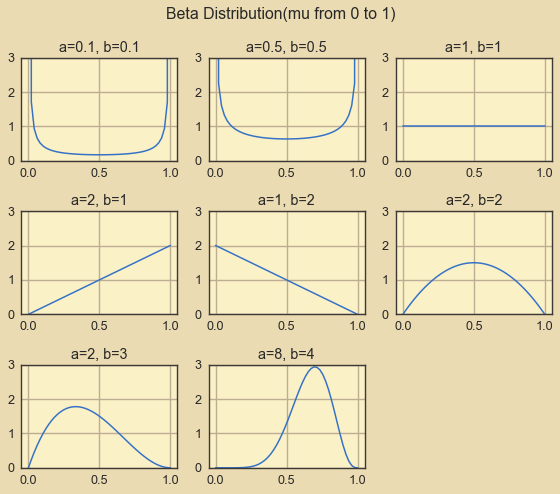

In [5]:
ab_pairs = [(0.1, 0.1), (0.5, 0.5), (1, 1), (2, 1), (1, 2), (2, 2), (2, 3),
            (8, 4)]

size = ceil(len(ab_pairs)**0.5)
eps = 1e-7
mu = np.linspace(eps, 1 - eps)

for i, (a, b) in enumerate(ab_pairs):
    ax = plt.subplot(size, size, i + 1)
    ax.set_ylim(ymax=3)
    ax.plot(mu, beta(mu, a, b))
    ax.set_title("a={}, b={}".format(a, b))

plt.suptitle("Beta Distribution(mu from 0 to 1)")
plt.tight_layout()

## Sequential Beta prediction

1s: 9, 0s: 6.


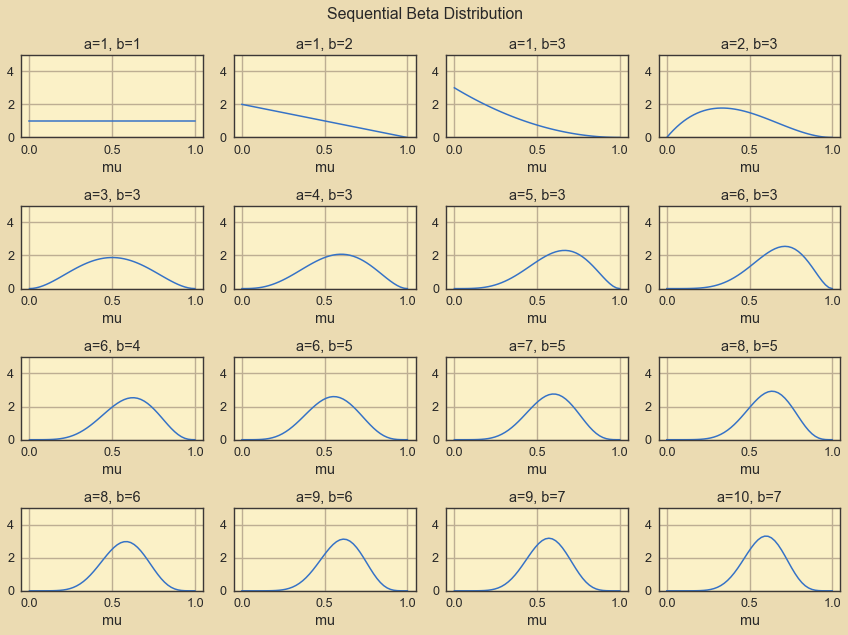

In [15]:
plt.figure(figsize=(12, 9))

obs = [np.random.randint(2) for _ in range(15)]
print("1s: {}, 0s: {}.".format(obs.count(1), obs.count(0)))
ab_pairs = [(1, 1)]

for i in obs:
    a, b = ab_pairs[-1]
    ab_pairs.append((a + i, b + (1 - i)))

size = ceil(len(ab_pairs)**0.5)
eps = 1e-7
mu = np.linspace(eps, 1 - eps)

for i, (a, b) in enumerate(ab_pairs):
    ax = plt.subplot(size, size, i + 1)
    ax.set_ylim(ymax=5)
    ax.set_xlabel("mu")
    ax.plot(mu, beta(mu, a, b))
    ax.set_title("a={}, b={}".format(a, b))

plt.suptitle("Sequential Beta Distribution")
plt.tight_layout()

## Samples for Dirichlet Function (K=3)

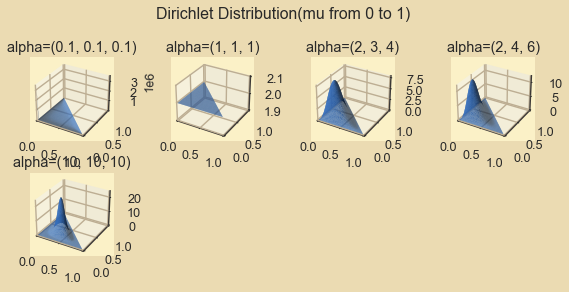

In [172]:
alphas = [(0.1, 0.1, 0.1), (1, 1, 1), (2, 3, 4), (2, 4, 6), (10, 10, 10)]

size = ceil(len(ab_pairs)**0.5)
eps = 1e-5
mu1 = np.linspace(eps, 1 - eps, 50)
mu2 = np.linspace(eps, 1 - eps, 50)
mu1, mu2 = np.meshgrid(mu1, mu2)

for i, alpha in enumerate(alphas):
    res = [(m1, m2, dirichlet([m1, m2, 1 - m1 - m2], alpha))
           for m1, m2 in zip(mu1.flatten(), mu2.flatten())
           if (1 - m1 - m2) > 0]
    ax = plt.subplot(size, size, i + 1, projection='3d')
    ax.set_xlim(xmax=1.0)
    ax.set_ylim(ymax=1.0)
    x = [i[0] for i in res]
    y = [i[1] for i in res]
    z = [i[2] for i in res]

    ax.set_xlim(xmax=1.0)
    ax.set_ylim(ymax=1.0)
    ax.plot_trisurf(x, y, z)
    ax.set_title("alpha={}".format(str(alpha)))

plt.suptitle("Dirichlet Distribution(mu from 0 to 1)")
plt.tight_layout()

## Sequential Dirichlet prediction

2s:4 1s: 9, 0s: 2.


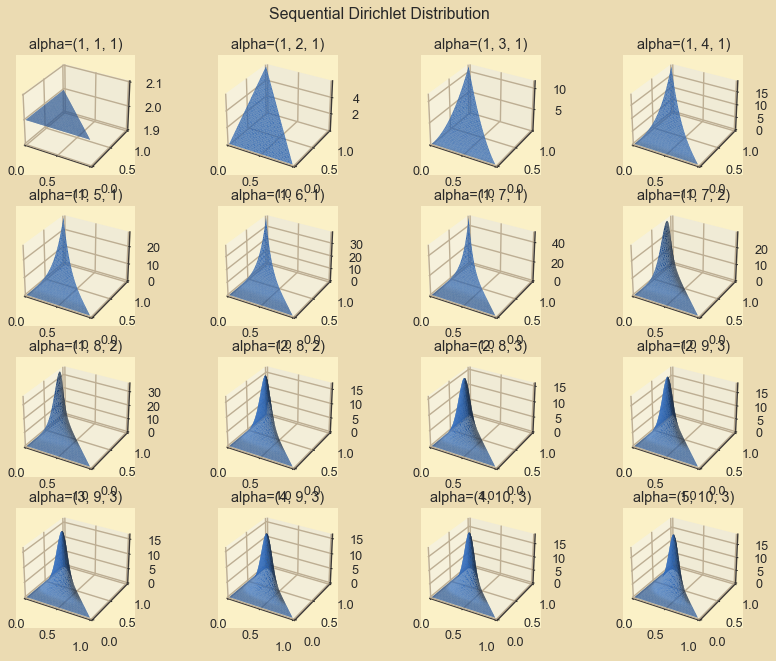

In [173]:
plt.figure(figsize=(12, 9))

obs = [np.random.randint(3) for _ in range(15)]
print("2s:{} 1s: {}, 0s: {}.".format(obs.count(2), obs.count(1), obs.count(0)))
alphas = [(1, 1, 1)]

for i in obs:
    alpha = alphas[-1]
    alphas.append(
        (alpha[0] + (i == 2), alpha[1] + (i == 1), alpha[2] + (i == 0)))

size = ceil(len(ab_pairs)**0.5)
eps = 1e-5
mu1 = np.linspace(eps, 1 - eps, 50)
mu2 = np.linspace(eps, 1 - eps, 50)
mu1, mu2 = np.meshgrid(mu1, mu2)

for i, alpha in enumerate(alphas):
    res = [(m1, m2, dirichlet([m1, m2, 1 - m1 - m2], alpha))
           for m1, m2 in zip(mu1.flatten(), mu2.flatten())
           if (1 - m1 - m2) > 0]
    ax = plt.subplot(size, size, i + 1, projection='3d')
    ax.set_xlim(xmax=1.0)
    ax.set_ylim(ymax=1.0)
    x = [i[0] for i in res]
    y = [i[1] for i in res]
    z = [i[2] for i in res]

    ax.set_xlim(xmax=1.0)
    ax.set_ylim(ymax=1.0)
    ax.plot_trisurf(x, y, z)
    ax.set_title("alpha={}".format(str(alpha)))

plt.suptitle("Sequential Dirichlet Distribution")
plt.tight_layout()